In [1]:
import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
import pandas as pd

xls = pd.ExcelFile('df_radon_combined.xlsx')

xls.sheet_names 

df = {}
for num in xls.sheet_names[2:]:
    df[num] = pd.read_excel(xls, num) 
    print(df[num].shape) 

#remove these indexes
devices = ['1', '2', '5', '9', '17', '23', '27', '28', '36', '44', '48']
for key in list(df):
    if key in devices:
        del df[key]

for key in df:
    print(key)
    print(df[key].shape)
    df[key]['SyncDate'] = pd.to_datetime(df[key]['SyncDate'])
    print(f"{df[key]['SyncDate'].min()} - {df[key]['SyncDate'].max()}")
    df[key].sort_values(by='SyncDate', ascending=True, inplace=True)
    df[key]['SyncDate'] = df[key]['SyncDate'].dt.floor('H')
    df[key] = df[key].resample('H', on = 'SyncDate').mean()
    df[key] = df[key].interpolate(method='linear', limit_direction='both')
    start_time = pd.to_datetime('2022-05-11T18:29:00.000000000')
    end_time = pd.to_datetime('2023-06-06T12:00:00.000000000')
    df[key] = df[key][(df[key].index >= start_time) & (df[key].index <= end_time)]
    print(f"{df[key].index.min()} - {df[key].index.max()}")

(7546, 6)
(7365, 6)
(8993, 6)
(9182, 6)
(9234, 6)
(7539, 6)
(8937, 6)
(7715, 6)
(9234, 6)
(8940, 6)
(9332, 6)
(8726, 6)
(9063, 6)
(6082, 6)
(8957, 6)
(9092, 6)
(9218, 6)
(10739, 6)
(8909, 6)
(7703, 6)
(9136, 6)
(8175, 6)
(7176, 6)
(8803, 6)
(9101, 6)
(8957, 6)
(8964, 6)
(9058, 6)
(9050, 6)
(6916, 6)
(9001, 6)
(9035, 6)
(8106, 6)
(8999, 6)
(1579, 6)
(9320, 6)
(9101, 6)
(7524, 6)
(9098, 6)
(8960, 6)
3
(8993, 6)
2022-05-08 00:16:30 - 2023-06-06 12:25:38
2022-05-11 19:00:00 - 2023-06-06 12:00:00
4
(9182, 6)
2022-05-08 00:17:23 - 2023-06-06 12:26:06
2022-05-11 19:00:00 - 2023-06-06 12:00:00
7
(7539, 6)
2022-04-01 10:18:57 - 2023-06-06 12:30:25
2022-05-11 19:00:00 - 2023-06-06 12:00:00
8
(8937, 6)
2022-04-04 18:52:46 - 2023-06-06 12:27:12
2022-05-11 19:00:00 - 2023-06-06 12:00:00
10
(9234, 6)
2022-05-08 00:56:00 - 2023-06-06 23:02:00
2022-05-11 19:00:00 - 2023-06-06 12:00:00
11
(8940, 6)
2022-05-08 00:50:01 - 2023-06-07 12:13:32
2022-05-11 19:00:00 - 2023-06-06 12:00:00
13
(9332, 6)
2022-05-

In [3]:
 df_radon = pd.DataFrame(index=df['50'].index)

In [4]:
for key in df:
    print(key)
    df_radon[f'Radon_{key}'] = df[key]['Radon']

3
4
7
8
10
11
13
15
16
18
19
20
21
22
25
26
29
30
31
32
35
37
39
41
43
45
46
49
50


In [5]:
df_radon

Radon_3  Radon_4   Radon_7  Radon_8  Radon_10  Radon_11  \
SyncDate                                                                       
2022-05-11 19:00:00     1.20     1.60  0.304717     6.80  1.300000     10.00   
2022-05-11 20:00:00     1.20     1.60  0.305031     6.80  1.400000     10.00   
2022-05-11 21:00:00     1.10     1.70  0.305346     6.80  1.500000     10.20   
2022-05-11 22:00:00     0.90     1.80  0.305660     6.60  1.600000     10.20   
2022-05-11 23:00:00     0.90     1.80  0.305975     6.60  1.500000     10.00   
...                      ...      ...       ...      ...       ...       ...   
2023-06-06 08:00:00    14.90    37.60  1.500000     4.85  1.400000     16.10   
2023-06-06 09:00:00    13.65    39.45  1.500000     4.60  1.400000     15.55   
2023-06-06 10:00:00    13.30    38.35  1.400000     4.25  1.300000     14.55   
2023-06-06 11:00:00    11.30    36.30  1.500000     2.70  1.336364     10.80   
2023-06-06 12:00:00    16.60    31.90  1.700000     6.80  1.372727     18.90   

                     Radon_13   Radon_15  Radon_16  Radon_18  ...  Radon_32  \
SyncDate                                                      ...             
2022-05-11 19:00:00  3.700000  24.600000       0.6  1.300000  ...      2.80   
2022-05-11 20:00:00  3.600000  24.200000       0.6  1.300000  ...      2.80   
2022-05-11 21:00:00  3.600000  24.200000       0.6  1.200000  ...      2.70   
2022-05-11 22:00:00  3.600000  24.000000       0.5  1.200000  ...      2.60   
2022-05-11 23:00:00  3.300000  23.900000       0.5  1.000000  ...      2.50   
...                       ...        ...       ...       ...  ...       ...   
2023-06-06 08:00:00  7.200000   0.031963       1.0  1.200000  ...      5.15   
2023-06-06 09:00:00  8.200000   0.027397       1.0  1.100000  ...      5.15   
2023-06-06 10:00:00  8.900000   0.022831       1.0  1.100000  ...      4.90   
2023-06-06 11:00:00  8.971429   0.018265       1.0  1.114286  ...      4.00   
2023-06-06 12:00:00  9.042857   0.013699       1.0  1.128571  ...      7.10   

                     Radon_35  Radon_37  Radon_39  Radon_41  Radon_43  \
SyncDate                                                                
2022-05-11 19:00:00      1.80      0.70       0.5      1.20     10.80   
2022-05-11 20:00:00      1.80      0.60       0.5      1.30     10.20   
2022-05-11 21:00:00      1.90      0.60       0.5      1.20     10.30   
2022-05-11 22:00:00      1.90      0.70       0.5      1.20     10.20   
2022-05-11 23:00:00      2.00      0.70       0.6      1.20     10.00   
...                       ...       ...       ...       ...       ...   
2023-06-06 08:00:00      2.30      6.25       2.1      0.70      6.35   
2023-06-06 09:00:00      2.30      6.05       2.1      0.70      6.20   
2023-06-06 10:00:00      2.25      6.05       2.1      0.70      6.50   
2023-06-06 11:00:00      1.90      4.80       2.1      0.75      6.30   
2023-06-06 12:00:00      2.50      5.60       2.3      1.40      4.50   

                     Radon_45  Radon_46  Radon_49  Radon_50  
SyncDate                                                     
2022-05-11 19:00:00       5.6      0.90      1.20      6.90  
2022-05-11 20:00:00       5.7      0.90      1.10      8.20  
2022-05-11 21:00:00       5.6      1.00      1.00      9.60  
2022-05-11 22:00:00       5.2      1.00      0.90      8.70  
2022-05-11 23:00:00       4.9      1.00      0.90      8.90  
...                       ...       ...       ...       ...  
2023-06-06 08:00:00      11.7     30.95      2.45     34.25  
2023-06-06 09:00:00      11.3     30.80      2.35     33.40  
2023-06-06 10:00:00      10.8     30.40      2.35     32.60  
2023-06-06 11:00:00       7.1     23.00      2.30     24.50  
2023-06-06 12:00:00      15.1     36.70      2.10     37.70  

[9378 rows x 29 columns]

In [6]:
df_radon = df_radon.T

In [7]:
df_radon

SyncDate  2022-05-11 19:00:00  2022-05-11 20:00:00  2022-05-11 21:00:00  \
Radon_3              1.200000             1.200000             1.100000   
Radon_4              1.600000             1.600000             1.700000   
Radon_7              0.304717             0.305031             0.305346   
Radon_8              6.800000             6.800000             6.800000   
Radon_10             1.300000             1.400000             1.500000   
Radon_11            10.000000            10.000000            10.200000   
Radon_13             3.700000             3.600000             3.600000   
Radon_15            24.600000            24.200000            24.200000   
Radon_16             0.600000             0.600000             0.600000   
Radon_18             1.300000             1.300000             1.200000   
Radon_19            11.600000            11.600000            11.100000   
Radon_20             1.300000             1.200000             1.200000   
Radon_21             1.300000             1.400000             1.600000   
Radon_22             5.600000             5.600000             5.200000   
Radon_25             0.900000             1.000000             1.000000   
Radon_26            49.500000            49.500000            49.200000   
Radon_29            14.000000            14.000000            14.000000   
Radon_30             0.500000             0.500000             0.500000   
Radon_31             1.400000             1.400000             1.400000   
Radon_32             2.800000             2.800000             2.700000   
Radon_35             1.800000             1.800000             1.900000   
Radon_37             0.700000             0.600000             0.600000   
Radon_39             0.500000             0.500000             0.500000   
Radon_41             1.200000             1.300000             1.200000   
Radon_43            10.800000            10.200000            10.300000   
Radon_45             5.600000             5.700000             5.600000   
Radon_46             0.900000             0.900000             1.000000   
Radon_49             1.200000             1.100000             1.000000   
Radon_50             6.900000             8.200000             9.600000   

SyncDate  2022-05-11 22:00:00  2022-05-11 23:00:00  2022-05-12 00:00:00  \
Radon_3               0.90000             0.900000             0.800000   
Radon_4               1.80000             1.800000             1.900000   
Radon_7               0.30566             0.305975             0.306289   
Radon_8               6.60000             6.600000             6.300000   
Radon_10              1.60000             1.500000             1.500000   
Radon_11             10.20000            10.000000             9.400000   
Radon_13              3.60000             3.300000             2.900000   
Radon_15             24.00000            23.900000            24.000000   
Radon_16              0.50000             0.500000             0.500000   
Radon_18              1.20000             1.000000             0.900000   
Radon_19             11.00000            11.400000            11.200000   
Radon_20              1.10000             1.100000             1.000000   
Radon_21              1.60000             1.600000             1.600000   
Radon_22              5.20000             5.300000             5.300000   
Radon_25              0.90000             0.900000             0.800000   
Radon_26             47.90000            47.900000            47.000000   
Radon_29             13.90000            13.800000            13.900000   
Radon_30              0.60000             0.600000             0.600000   
Radon_31              1.30000             1.200000             1.200000   
Radon_32              2.60000             2.500000             2.300000   
Radon_35              1.90000             2.000000             2.100000   
Radon_37              0.70000             0.700000             0.700000   
Radon_39              0.

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
values = sc.fit_transform(df_radon.values)

In [9]:
import umap
reducer = umap.UMAP(n_components=3)

In [10]:
embedding = reducer.fit_transform(values)

In [11]:
embedding.shape

(29, 3)

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(embedding)
    wcss.append(kmeans.inertia_)

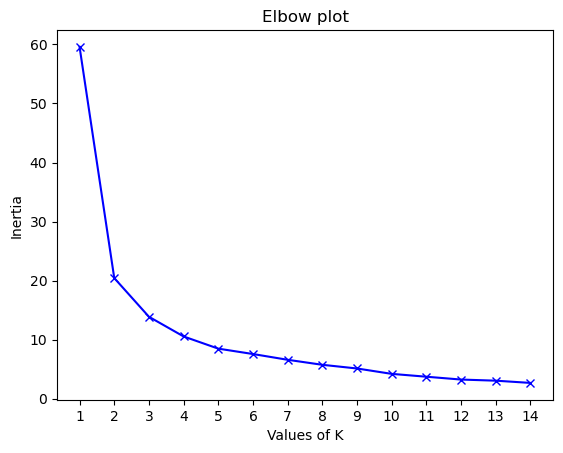

In [14]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1,15)], wcss, 'bx-')
plt.xlabel('Values of K')
plt.xticks([i for i in range(1,15)])
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(embedding)

KMeans(n_clusters=3)

In [16]:
kmeans.cluster_centers_

array([[1.7362674, 4.3695025, 5.083543 ],
       [4.4619756, 3.7941914, 4.581869 ],
       [3.3894913, 4.556212 , 4.884817 ]], dtype=float32)

In [17]:
silhouette_score(embedding, kmeans.labels_)

0.37814417

In [18]:
calinski_harabasz_score(embedding, kmeans.labels_)

42.88177588349679

In [19]:
davies_bouldin_score(embedding, kmeans.labels_)

0.919532554193096

Text(0.5, 0.92, 'UMAP projection of the Radon dataset with K-means Clustering')

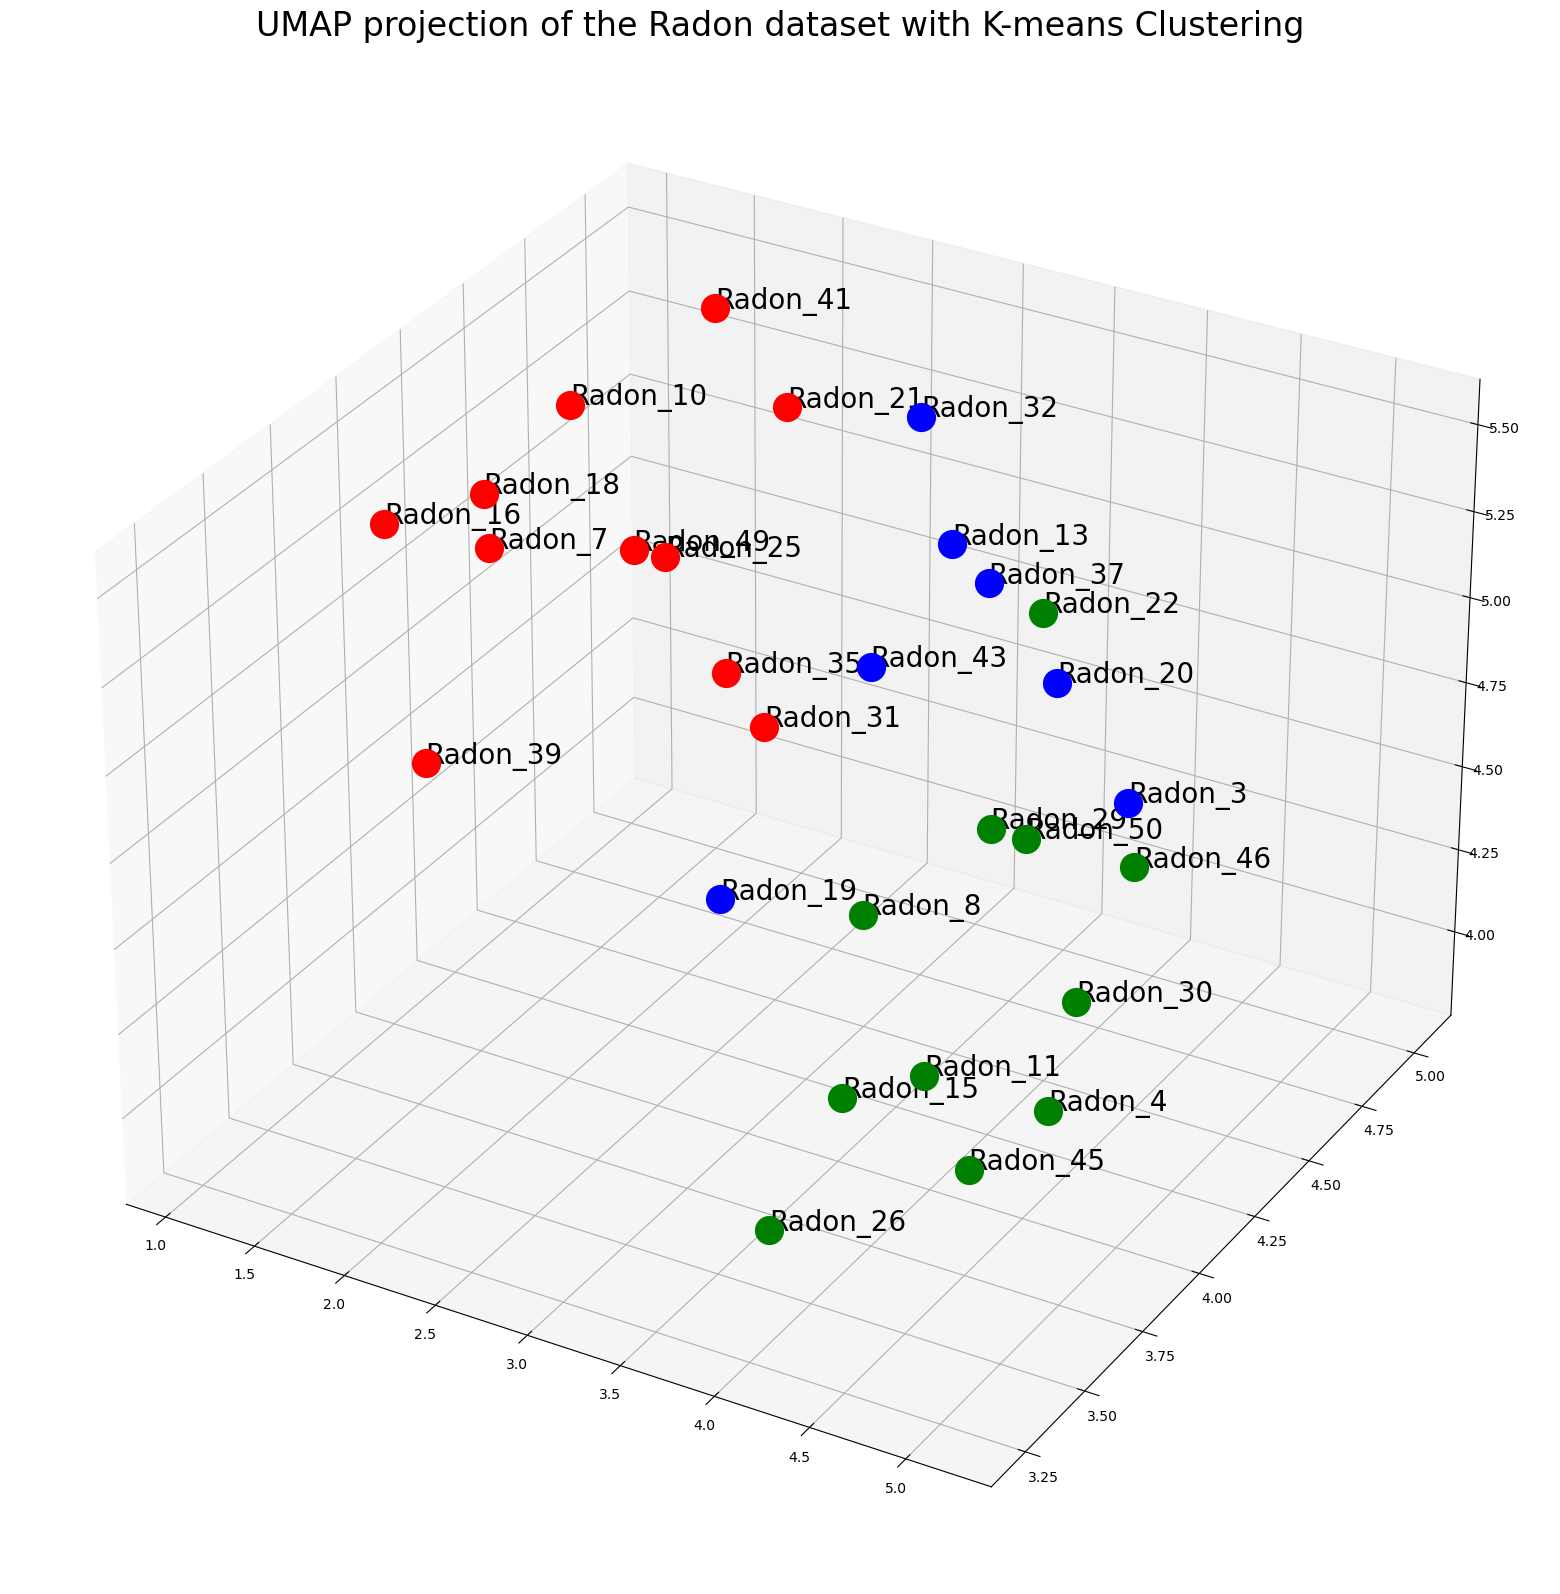

In [20]:
names = list(df_radon.index)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
labels = kmeans.labels_
colors = ['r', 'g', 'b','y','orange']
for i in range(len(embedding)):
    x = embedding[i,0]
    y = embedding[i, 1]
    z = embedding[i, 2]
    ax.scatter(
        x,
    y,z, s=400, c=colors[labels[i]])
    ax.text(x,y,z, names[i], size=20, zorder=1, color='k')

plt.title('UMAP projection of the Radon dataset with K-means Clustering', fontsize=24)

In [21]:
clusters =dict.fromkeys(set(kmeans.labels_), None)
import numpy as np
for i in clusters:
    clusters[i] = list(np.where(kmeans.labels_ == i)[0])
clusters

{0: [2, 4, 8, 9, 12, 14, 18, 20, 22, 23, 27],
 1: [1, 3, 5, 7, 13, 15, 16, 17, 25, 26, 28],
 2: [0, 6, 10, 11, 19, 21, 24]}

In [22]:
df_radon_scaled = pd.DataFrame(values, index=df_radon.index, columns=df_radon.columns)

In [23]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [24]:
for i in clusters:
    traces=[go.Scatter(
        x = df_radon_scaled.columns,
        y = df_radon_scaled.loc[name,:],
        mode = 'markers+lines',
        name = name
    ) for name in [list(df_radon_scaled.index)[j] for j in clusters[i]]]
    
    layout = go.Layout(title = f'Visualizing Scaled values of Cluster {i}')
    fig = go.Figure(data=traces, layout = layout)
    pyo.plot(fig, filename=f'Cluster_KMeans_2_{i}.html')

In [25]:
from sklearn.cluster import SpectralClustering, AffinityPropagation

In [26]:
clustering = AffinityPropagation().fit(embedding)
y_pred = clustering.labels_

In [27]:
silhouette_score(embedding, y_pred)

0.3482875

In [28]:
calinski_harabasz_score(embedding, y_pred)

37.56701359049432

In [29]:
davies_bouldin_score(embedding, y_pred)

0.9382359922189223

Text(0.5, 0.92, 'UMAP projection of the Radon dataset with Affinity Clustering')

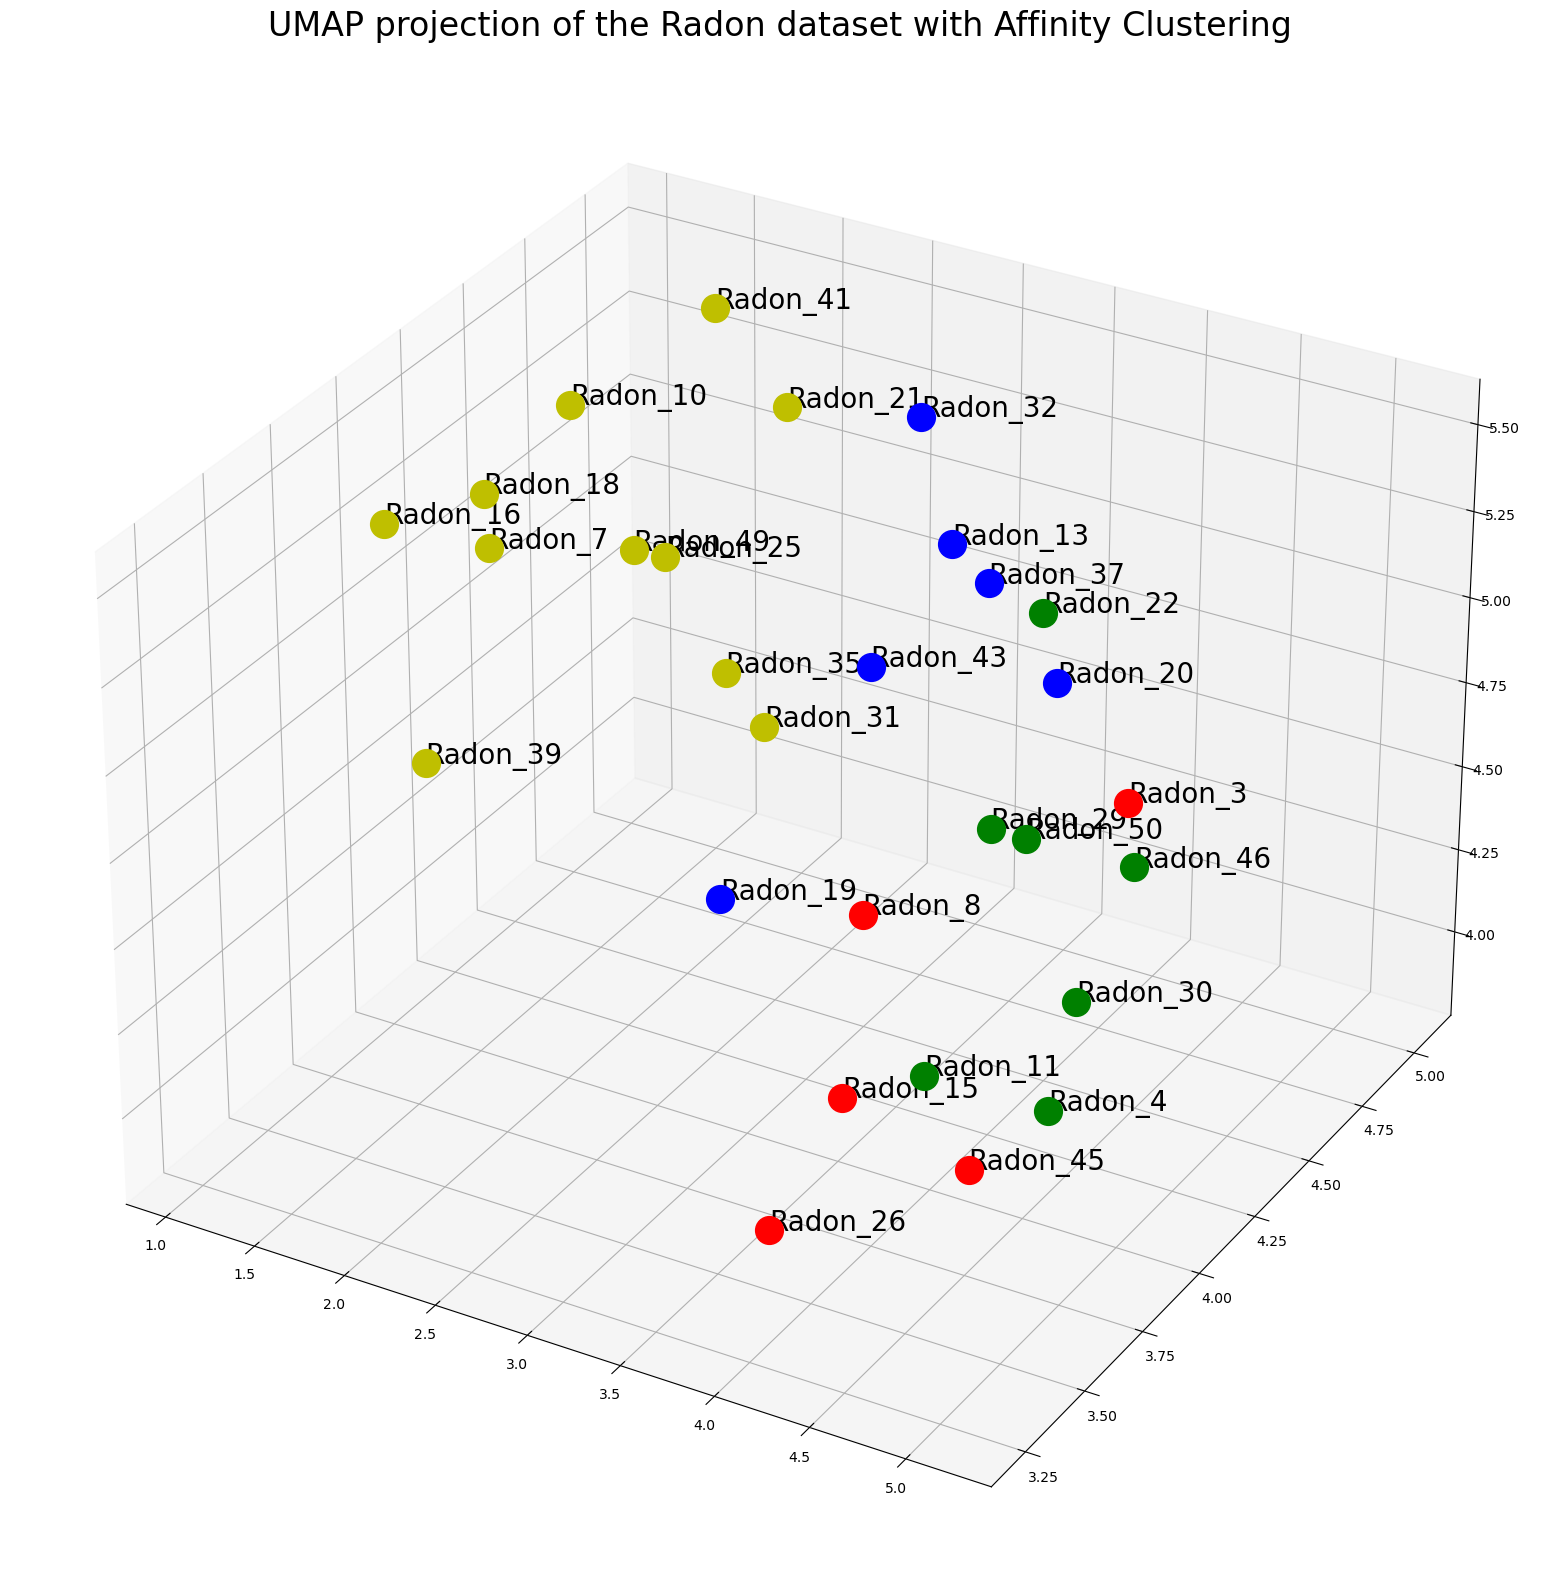

In [30]:
names = list(df_radon.index)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
colors = ['r', 'g', 'b','y','orange']
for i in range(len(embedding)):
    x = embedding[i,0]
    y = embedding[i, 1]
    z = embedding[i, 2]
    ax.scatter(
        x,
    y,z, s=400, c=colors[y_pred[i]])
    ax.text(x,y,z, names[i], size=20, zorder=1, color='k')

plt.title('UMAP projection of the Radon dataset with Affinity Clustering', fontsize=24)

In [31]:
clusters =dict.fromkeys(set(clustering.labels_), None)

In [32]:
import numpy as np
for i in clusters:
    clusters[i] = list(np.where(clustering.labels_ == i)[0])

In [33]:
clusters

{0: [0, 3, 7, 15, 25],
 1: [1, 5, 13, 16, 17, 26, 28],
 2: [6, 10, 11, 19, 21, 24],
 3: [2, 4, 8, 9, 12, 14, 18, 20, 22, 23, 27]}

In [34]:
for i in clusters:
    traces=[go.Scatter(
        x = df_radon_scaled.columns,
        y = df_radon_scaled.loc[name,:],
        mode = 'markers+lines',
        name = name
    ) for name in [list(df_radon_scaled.index)[j] for j in clusters[i]]]
    
    layout = go.Layout(title = f'Visualizing Scaled values of Cluster {i}')
    fig = go.Figure(data=traces, layout = layout)
    pyo.plot(fig, filename=f'Cluster_Affinity_{i}.html')

In [35]:
from scipy.spatial.distance import pdist, squareform
def getAffinityMatrix(coordinates, k = 7):
    """
    Calculate affinity matrix based on input coordinates matrix and the numeber
    of nearest neighbours.
    
    Apply local scaling based on the k nearest neighbour
        References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    """
    # calculate euclidian distance matrix
    dists = squareform(pdist(coordinates)) 
    
    # for each row, sort the distances ascendingly and take the index of the 
    #k-th position (nearest neighbour)
    knn_distances = np.sort(dists, axis=0)[k]
    knn_distances = knn_distances[np.newaxis].T
    
    # calculate sigma_i * sigma_j
    local_scale = knn_distances.dot(knn_distances.T)

    affinity_matrix = dists * dists
    affinity_matrix = -affinity_matrix / local_scale
    # divide square distance matrix by local scale
    affinity_matrix[np.where(np.isnan(affinity_matrix))] = 0.0
    # apply exponential
    affinity_matrix = np.exp(affinity_matrix)
    np.fill_diagonal(affinity_matrix, 0)
    return affinity_matrix

In [36]:
import scipy
from scipy.sparse import csgraph
# from scipy.sparse.linalg import eigsh
from numpy import linalg as LA
def eigenDecomposition(A, plot = True, topK = 3):
    """
    :param A: Affinity matrix
    :param plot: plots the sorted eigen values for visual inspection
    :return A tuple containing:
    - the optimal number of clusters by eigengap heuristic
    - all eigen values
    - all eigen vectors
    
    This method performs the eigen decomposition on a given affinity matrix,
    following the steps recommended in the paper:
    1. Construct the normalized affinity matrix: L = D−1/2ADˆ −1/2.
    2. Find the eigenvalues and their associated eigen vectors
    3. Identify the maximum gap which corresponds to the number of clusters
    by eigengap heuristic
    
    References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/Luxburg07_tutorial_4488%5b0%5d.pdf
    """
    L = csgraph.laplacian(A, normed=True)
    n_components = A.shape[0]
    
    # LM parameter : Eigenvalues with largest magnitude (eigs, eigsh), that is, largest eigenvalues in 
    # the euclidean norm of complex numbers.
#     eigenvalues, eigenvectors = eigsh(L, k=n_components, which="LM", sigma=1.0, maxiter=5000)
    eigenvalues, eigenvectors = LA.eig(L)
    
    if plot:
        plt.title('Largest eigen values of input matrix')
        plt.scatter(np.arange(len(eigenvalues)), eigenvalues)
        plt.grid()
        
    # Identify the optimal number of clusters as the index corresponding
    # to the larger gap between eigen values
    index_largest_gap = np.argsort(np.diff(eigenvalues))[::-1][:topK]
    nb_clusters = index_largest_gap + 1
        
    return nb_clusters, eigenvalues, eigenvectors

In [37]:
affinity_matrix = getAffinityMatrix(embedding, k = 7)

Optimal number of clusters [2 1 3]
Respective Eigen values [5.55111512e-17 1.92404323e-01 6.68080543e-01 8.37798144e-01
 9.22726223e-01 9.65689663e-01 9.78763208e-01 1.03008614e+00
 1.05347903e+00 1.07337448e+00 1.08490270e+00 1.15000221e+00
 1.09116433e+00 1.09713366e+00 1.14019669e+00 1.13767827e+00
 1.10724670e+00 1.10917110e+00 1.13244453e+00 1.12990798e+00
 1.12853447e+00 1.12621326e+00 1.12577513e+00 1.11654328e+00
 1.11734186e+00 1.11851632e+00 1.12296049e+00 1.12084745e+00
 1.12101785e+00]


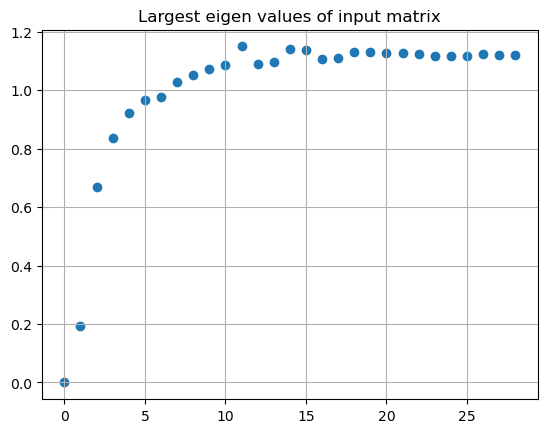

In [38]:
affinity_matrix = getAffinityMatrix(embedding, k = 10)
k, eigenvals,  _ = eigenDecomposition(affinity_matrix, plot=True)
print(f'Optimal number of clusters {k}')
print(f'Respective Eigen values {eigenvals}')

In [39]:
clustering = SpectralClustering(n_clusters=3).fit(embedding)
y_pred = clustering.labels_

In [40]:
silhouette_score(embedding, y_pred)

0.3818532

In [41]:
calinski_harabasz_score(embedding, y_pred)

40.87556220217761

In [42]:
davies_bouldin_score(embedding, y_pred)

0.9268557381465138

Text(0.5, 0.92, 'UMAP projection of the Radon dataset with Spectral Clustering')

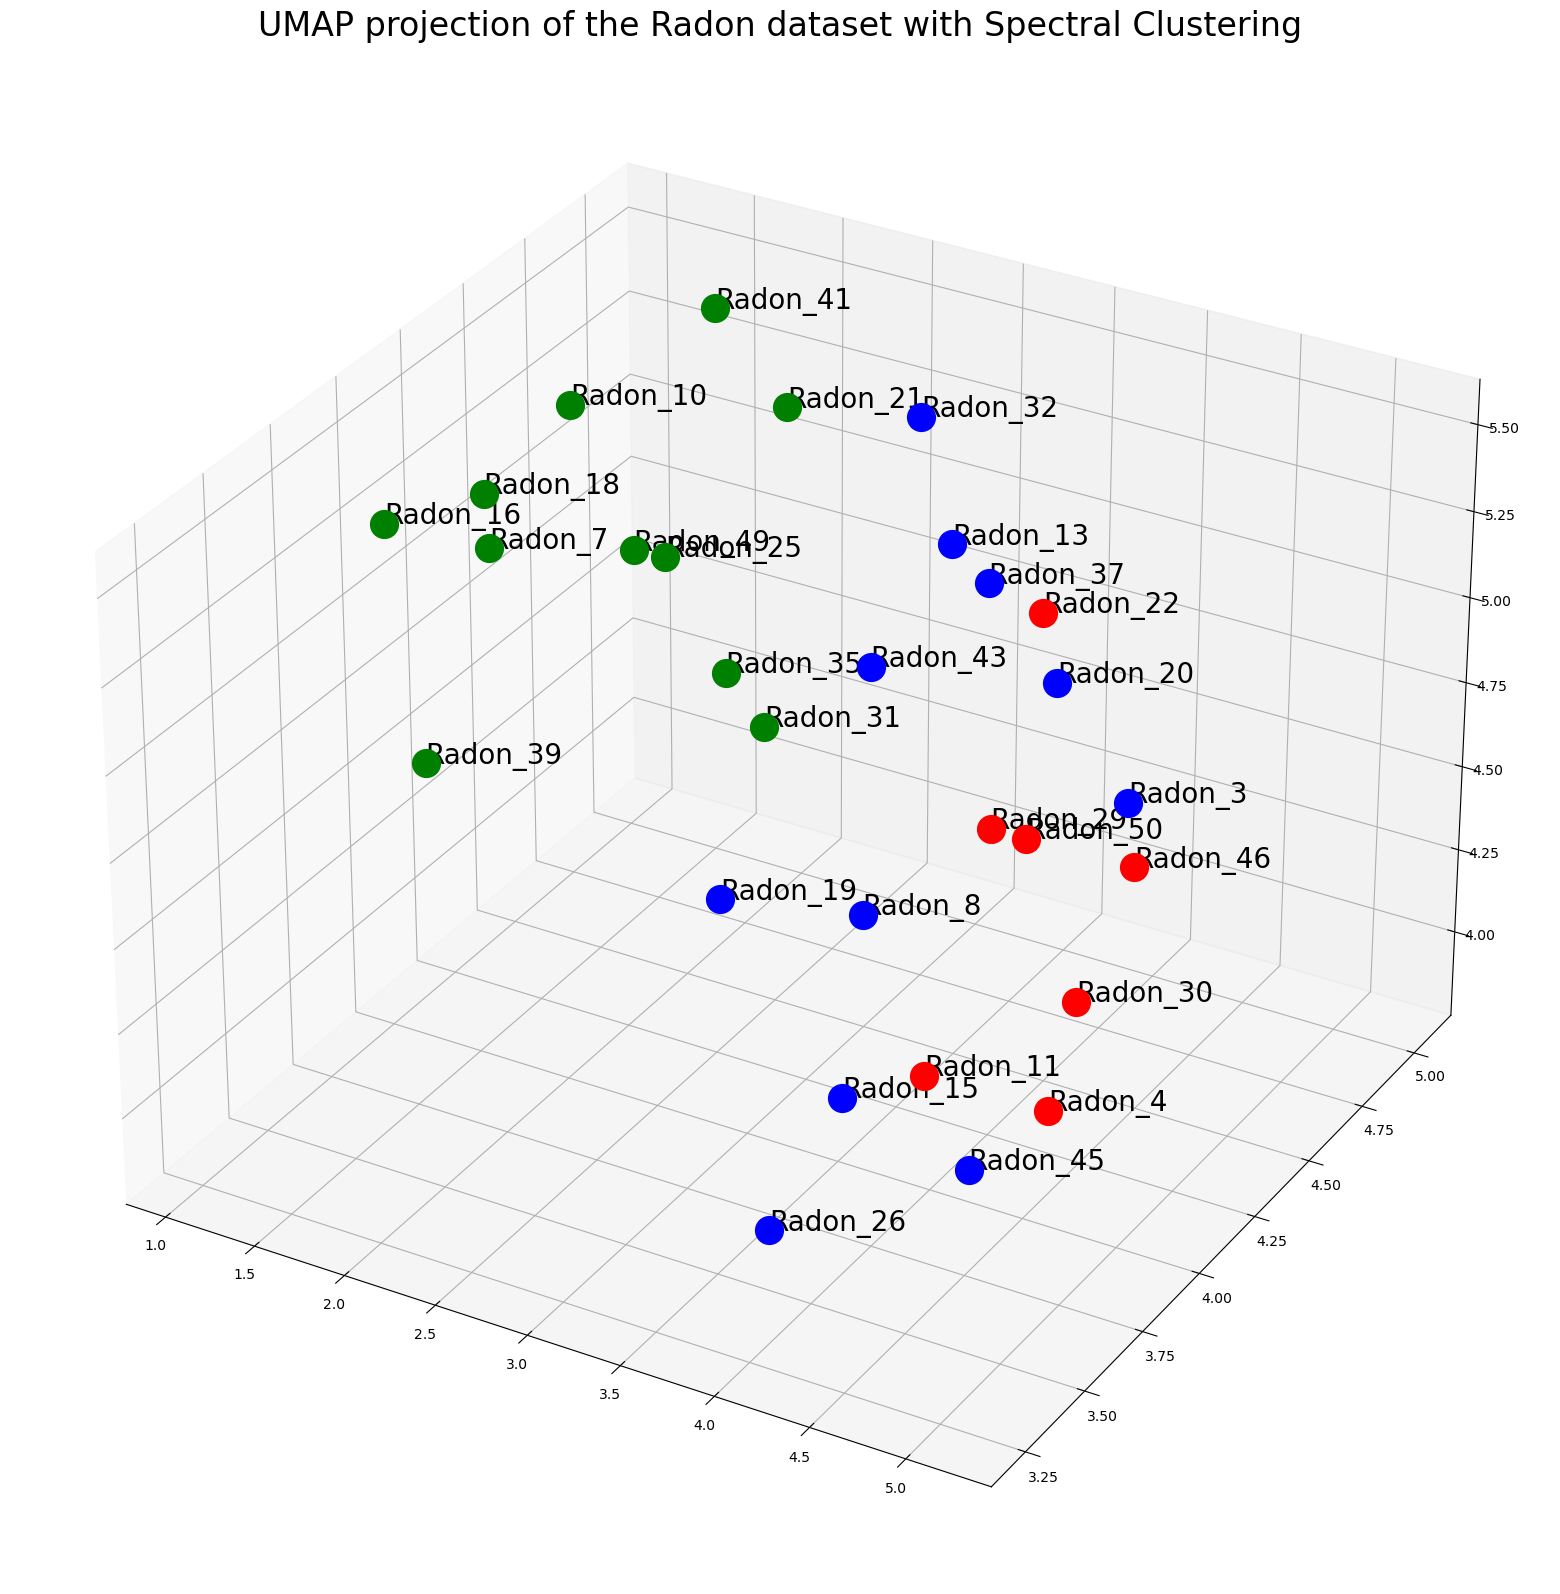

In [43]:
names = list(df_radon.index)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
colors = ['r', 'g', 'b','y','orange']
for i in range(len(embedding)):
    x = embedding[i,0]
    y = embedding[i, 1]
    z = embedding[i, 2]
    ax.scatter(
        x,
    y,z, s=400, c=colors[y_pred[i]])
    ax.text(x,y,z, names[i], size=20, zorder=1, color='k')

plt.title('UMAP projection of the Radon dataset with Spectral Clustering', fontsize=24)

In [44]:
clusters =dict.fromkeys(set(clustering.labels_), None)
import numpy as np
for i in clusters:
    clusters[i] = list(np.where(clustering.labels_ == i)[0])

clusters

for i in clusters:
    traces=[go.Scatter(
        x = df_radon_scaled.columns,
        y = df_radon_scaled.loc[name,:],
        mode = 'markers+lines',
        name = name
    ) for name in [list(df_radon_scaled.index)[j] for j in clusters[i]]]
    
    layout = go.Layout(title = f'Visualizing Scaled values of Cluster {i}')
    fig = go.Figure(data=traces, layout = layout)
    pyo.plot(fig, filename=f'UMAP_Cluster_Spectral_{i}.html')

In [45]:
#louvain algorithm for clustering
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import scipy
from tqdm import tqdm
from sklearn import preprocessing
import networkx as nx
import community
import numpy as np
import string
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import kneighbors_graph
import igraph as ig
import leidenalg

In [46]:
plt.ion()
plt.show()

In [47]:
def cluster_by_connectivity(data, neighbors = 10, resolution_parameter = 1):
    """
    This method partitions input data by applying the louvain algorithm
    on the connectivity binary matrix returned by the kneighbors graph.
    """
    A = kneighbors_graph(data, neighbors, mode='connectivity', include_self=True)
    sources, targets = A.nonzero()
    weights = A[sources, targets]
    if isinstance(weights, np.matrix): # ravel data
        weights = weights.A1
    g = ig.Graph(directed=False)
    g.add_vertices(A.shape[0])  # each observation is a node
    edges = list(zip(sources, targets))
    g.add_edges(edges)
    
    g.es['weight'] = weights
    weights = np.array(g.es["weight"]).astype(np.float64)
    partition_type = leidenalg.RBERVertexPartition
    partition_kwargs = {}
    partition_kwargs["weights"] = weights
    partition_kwargs["resolution_parameter"] = resolution_parameter
    part = leidenalg.find_partition(g, partition_type, **partition_kwargs)
    groups = np.array(part.membership)
    return groups

In [48]:
prediction = cluster_by_connectivity(df_radon_scaled.values)
Counter(prediction)

Counter({1: 9, 2: 6, 0: 11, 3: 2, 4: 1})

In [49]:
prediction

array([1, 2, 0, 1, 0, 2, 1, 1, 0, 0, 3, 1, 3, 4, 0, 1, 2, 2, 0, 0, 0, 1,
       0, 0, 1, 1, 2, 0, 2])

## What is UMAP?

### Short Answer: UMAP is an algorithm for dimension reduction based on manifold learning techniques and ideas from topological data analysis. It provides a very general framework for approaching manifold learning and dimension reduction, but can also provide specific concrete realizations.

### Another mathematical short answer: UMAP is a non-parametric graph-based dimensionality reduction algorithm using applied Riemannian geometry and algebraic topology to find low-dimensional embeddings of structured data

### There are two main steps in UMAP:
1. Compute a graphical representation of a dataset (fuzzy simplical complex)
2. Through stochastic gradient descent, optimize a low-dimensional embedding of the graph.

### Theory Behind Step 1

### Topological Data Analysis and Simplicial Complexes
- Simplicial complexes are a means to construct topological spaces out of simple combinatorial components. 
- This allows one to reduce the complexities of dealing with the continuous geometry of topological spaces to the task of relatively simple combinatorics and counting. 
- This method of taming geometry and topology will be fundamental to our approach to topological data analysis in general, and dimension reduction in particular.
### The first step is to provide some simple combinatorial building blocks called "simplices".

Geometrically a simplex is a very simple way to build a k-dimensional object. A $k$ dimensional simplex is called a $k-simplex$, and it is formed by taking the convex hull of k+1 independent points. Thus a 0-simplex is a point, a 1-simplex is a line segment (between two zero simplices), a 2-simplex is a triangle (with three 1-simplices as “faces”), and a 3-simplex is a tetrahedron (with four 2-simplices as “faces”). Such a simple construction allows for easy generalization to arbitrary dimensions.

![](simplices.png)

- This has a very simple combinatorial underlying structure, and ultimately one can regard a k-simplex as an arbitrary set of k+1 objects with faces (and faces of faces etc.) given by appropriately sized subsets – one can always provide a “geometric realization” of this abstract set description by constructing the corresponding geometric simplex.

### Simplices can provide building blocks, but to construct interesting topological spaces we need to be able to glue together such building blocks. This can be done by constructing a "simplicial complex".

- Ostensibly a simplicial complex is a set of simplices glued together along faces.

- More explicitly a simplicial complex $K$ is a set of simplices such that any face of any simplex in $K$ is also in $K$ (ensuring all faces exist), and the intersection of any two simplices in $K$ is a face of both simplices. 
- A large class of topological spaces can be constructed in this way – just gluing together simplices of various dimensions along their faces.

- Simplical complexes are build using simplical sets which is a combinatorial, if we have a good number of categories of simplical sets then we can generate a broader class of topological spaces.

### How do we apply theoretical tools from topology to finite sets of data points?

- Step one would be to understand how can we construct a simplical complex from a topological space.

- The tool used for this is 'Čech complex' given an open cover of topological space.
- An open cover is essentially just a family of sets whose union is the whole space. and a Čech complex is a combinatorial way to conver that into a simplical complex. 

- This is how it works, let each set in the cover be a 0-simplex; create a 1-simplex between two such sets if they have a non-empty intersection; create a 2-simplex between three such sets if the triple intersection of all three is non-empty; and so on.

-  Now, that doesn’t sound very advanced – just looking at intersections of sets. The key is that the background topological theory actually provides guarantees about how well this simple process can produce something that represents the topological space itself in a meaningful way (the Nerve theorem is the relevant result for those interested).

- Obviously the quality of the cover is important, and finer covers provide more accuracy, but the reality is that despite its simplicity the process captures much of the topology.

### Next we need to understand how to apply the above process to a finite set of data samples?

- If we assume that the data samples are drawn from some underlying topological space then to learn about the topology of that space we need to generate the `open cover` of it.

- If our data lies in a metric space (i.e., we can measure the distance between points) then one way to approximate an open cover is to simply create balls of some fixed radios about each data point. Since, we only have finite samples, and not the whole topology space, we cannot say that is an true open cover.

- This approximation of open cover might be an reasonable approximation. 

- This approach has an advantage as we have already created our zero simplex for each data point.


### Example dataset

1. Let's take a noisy dataset as follows
![](how_umap_works_raw_data.png)

2. if we fix an radius then we can picture the open sets og our cover as circles(since we are in a nice visualizable two dimensional case), the result would look like as follows:
![](how_umap_works_open_cover.png)

3. Then we can depict a simplical complex of 0-, 1-, and 2- simplices as points, lines and triangles

![](how_umap_works_basic_graph.png)

### It is harder to depict in higher dimensional space but this gives us an intuition.

#### There are two things to note here:
1. first, the simplical complex does a reasonable job of starting to capture the fundamental topology of the dataset
2. Secondly, most of the work is really done by 0- and 1- simplices, which are easier to deal with computationally.

### This motivates the usage of `Vietoris-Rips complex`

- This is similar to Čech complex but is entirely determined by 0- and 1- simplices. 
- Vietoris-Rips complexes are much easier to work with computationally, especially for large datasets, and are one of the major tools of topological data analysis.

#### If we take this approach to get a topological representation then we can build a dimension reduction algorithm by finding a low dimensional representation of the data that has a similar topological representation. If we only care about the 0- and 1-simplices then the topological representation is just a graph, and finding a low dimensional representation can be described as a graph layout problem. If one wants to use, for example, spectral methods for graph layout then we arrive at algorithms like Laplacian eigenmaps and Diffusion maps. Force directed layouts are also an option, and provide algorithms closer to MDS or Sammon mapping in flavour.


## Adapting to Real World Data

- The approach described above provides a nice theory for why a neighborhood graph based approach should capture manifold structure when doing dimension reduction. 
- The problem tends to come when one tries to put the theory into practice. The first obvious difficulty (and we can see it even our example above) is that choosing the right radius for the balls that make up the open cover is hard. 
- If you choose something too small the resulting simplicial complex splits into many connected components. If you choose something too large the simplicial complex turns into just a few very high dimensional simplices (and their faces etc.) and fails to capture the manifold structure anymore. How should one solve this?

- The dilemma is in part due to the theorem (called the Nerve theorem) that provides our justification that this process captures the topology. Specifically, the theorem says that the simplicial complex will be (homotopically) equivalent to the union of the cover. In our case, working with finite data, the cover, for certain radii, doesn’t cover the whole of the manifold that we imagine underlies the data – it is that lack of coverage that results in the disconnected components. 

- Similarly, where the points are too bunched up, our cover does cover “too much” and we end up with higher dimensional simplices than we might ideally like. If the data were uniformly distributed across the manifold then selecting a suitable radius would be easy – the average distance between points would work well. Moreover with a uniform distribution we would be guaranteed that our cover would actually cover the whole manifold with no “gaps” and no unnecessarily disconnected components.

- Similarly, we would not suffer from those unfortunate bunching effects resulting in unnecessarily high dimensional simplices.

- If we consider data that is uniformly distributed along the same manifold it is not hard to pick a good radius (a little above half the average distance between points) and the resulting open cover looks pretty good:

![](how_umap_works_uniform_distribution_cover.png)

- Unsurprisingly this uniform distribution assumption crops up elsewhere in manifold learning. The proofs that Laplacian eigenmaps work well require the assumption that the data is uniformly distributed on the manifold. Clearly if we had a uniform distribution of points on the manifold this would all work a lot better – but we don’t! Real world data simply isn’t that nicely behaved.

## How can we resolve this? 

- By turning the problem on its head: assume that the data is uniformly distributed on the manifold, and ask what that tells us about the manifold itself. 
- If the data looks like it isn’t uniformly distributed that must simply be because the notion of distance is varying across the manifold – space itself is warping: stretching or shrinking according to where the data appear sparser or denser.

- By assuming that the data is uniformly distributed we can actually compute (an approximation of) a local notion of distance for each point by making use of a little standard Riemannian geometry.

- In practical terms, once you push the math through, this turns out to mean that a unit ball about a point stretches to the k-th nearest neighbor of the point, where k is the sample size we are using to approximate the local sense of distance. 
- Each point is given its own unique distance function, and we can simply select balls of radius one with respect to that local distance function!
![](how_umap_works_local_metric_open_cover.png)

- This theoretically derived result matches well with many traditional graph based algorithms: a standard approach for such algorithms is to use a k-neighbor graph instead of using balls of some fixed radius to define connectivity. 
- What this means is that each point in the dataset is given an edge to each of its k nearest neighbors – the effective result of our locally varying metric with balls of radius one. 
- Now, however, we can explain why this works in terms of `simplicial complexes` and `the Nerve theorem.`

- Of course we have traded choosing the radius of the balls for choosing a value for k. However it is often easier to pick a resolution scale in terms of number of neighbors than it is to correctly choose a distance. - This is because choosing a distance is very dataset dependent: one needs to look at the distribution of distances in the dataset to even begin to select a good value. 
- In contrast, while a k value is still dataset dependent to some degree, there are reasonable default choices, such as the 10 nearest neighbors, that should work acceptably for most datasets.

- At the same time the topological interpretation of all of this gives us a more meaningful interpretation of k. 
- The choice of k determines how locally we wish to estimate the Riemannian metric. 
- A small choice of k means we want a very local interpretation which will more accurately capture fine detail structure and variation of the Riemannian metric. 
- Choosing a large k means our estimates will be based on larger regions, and thus, while missing some of the fine detail structure, they will be more broadly accurate across the manifold as a whole, having more data to make the estimate with.

- We also get a further benefit from this Riemannian metric based approach: we actually have a local metric space associated to each point, and can meaningfully measure distance, and thus we could weight the edges of the graph we might generate by how far apart (in terms of the local metric) the points on the edges are. 
- In slightly more mathematical terms we can think of this as working in a fuzzy topology where being in an open set in a cover is no longer a binary yes or no, but instead a fuzzy value between zero and one.

- Obviously the certainty that points are in a ball of a given radius will decay as we move away from the center of the ball. We could visualize such a fuzzy cover as looking something like this:

![](how_umap_works_fuzzy_open_cover.png)

- Note that this is not a requirement that the manifold as a whole be connected – it can be made up of many connected components. 

#### This resolves a number of issues, but a new problem presents itself when we apply this sort of process to real data, especially in higher dimensions: a lot of points become essentially totally isolated. One would imagine that this shouldn’t happen if the manifold the data was sampled from isn’t pathological. So what property are we expecting that manifold to have that we are somehow missing with the current approach? What we need to add is the idea of local connectivity.

- Note that this is not a requirement that the manifold as a whole be connected – it can be made up of many connected components.

- Instead it is a requirement that at any point on the manifold there is some sufficiently small neighborhood of the point that is connected (this “in a sufficiently small neighborhood” is what the “local” part means). 

-  For the practical problem we are working with, where we only have a finite approximation of the manifold, this means that no point should be completely isolated – it should connect to at least one other point. In terms of fuzzy open sets what this amounts to is that we should have complete confidence that the open set extends as far as the closest neighbor of each point. We can implement this by simply having the fuzzy confidence decay in terms of distance beyond the first nearest neighbor. We can visualize the result in terms of our example dataset again.

![](how_umap_works_umap_open_cover.png)

- Again this can be formalized in terms of the aforementioned mathematical machinery from algebraic topology. 
- From a practical standpoint this plays an important role for high dimensional data – in high dimensions distances tend to be larger, but also more similar to one another (see the curse of dimensionality). This means that the distance to the first nearest neighbor can be quite large, but the distance to the tenth nearest neighbor can often be only slightly larger (in relative terms). 
- The local connectivity constraint ensures that we focus on the difference in distances among nearest neighbors rather than the absolute distance (which shows little differentiation among neighbors).

- Just when we think we are almost there, having worked around some of the issues of real world data, we run aground on a new obstruction: our local metrics are not compatible! Each point has its own local metric associated to it, and from point a’s perspective the distance from point a to point b might be 1.5, but from the perspective of point b the distance from point b to point a might only be 0.6. Which point is right? How do we decide? Going back to our graph based intuition we can think of this as having directed edges with varying weights something like this.

![](how_umap_works_raw_graph.png)

- Between any two points we might have up to two edges and the weights on those edges disagree with one another. 
- There are a number of options for what to do given two disagreeing weights – we could take the maximum, the minimum, the arithmetic mean, the geometric mean, or something else entirely. 
- What we would really like is some principled way to make the decision. It is at this point that the mathematical machinery we built comes into play. 
- Mathematically we actually have a family of fuzzy simplicial sets, and the obvious choice is to take their union – a well defined operation. There are a a few ways to define fuzzy unions, depending on the nature of the logic involved, but here we have relatively clear probabilistic semantics that make the choice straightforward. 
- In graph terms what we get is the following: if we want to merge together two disagreeing edges with weight a and b then we should have a single edge with combined weight a+b−a⋅b. 
- The way to think of this is that the weights are effectively the probabilities that an edge (1-simplex) exists. The combined weight is then the probability that at least one of the edges exists.


- If we apply this process to union together all the fuzzy simplicial sets we end up with a single fuzzy simplicial complex, which we can again think of as a weighted graph. In computational terms we are simply applying the edge weight combination formula across the whole graph (with non-edges having a weight of 0). In the end we have something that looks like this.

![](how_umap_works_umap_graph.png)




- So in some sense in the end we have simply constructed a weighted graph (although we could make use of higher dimensional simplices if we wished, just at significant extra computational cost). What the mathematical theory lurking in the background did for us is determine why we should construct this graph. It also helped make the decisions about exactly how to compute things, and gives a concrete interpretation of what this graph means. So while in the end we just constructed a graph, the math answered the important questions to get us here, and can help us determine what to do next.

## So given that we now have a fuzzy topological representation of the data (which the math says will capture the topology of the manifold underlying the data), how do we go about converting that into a low dimensional representation?

- Ideally we want the low dimensional representation to have as similar a fuzzy topological structure as possible. The first question is how do we determine the fuzzy topological structure of a low dimensional representation, and the second question is how do we find a good one.

- The first question is largely already answered – we should presumably follow the same procedure we just used to find the fuzzy topological structure of our data. 
- There is a quirk, however: this time around the data won’t be lying on some manifold, we’ll have a low dimensional representation that is lying on a very particular manifold. 
- That manifold is, of course, just the low dimensional euclidean space we are trying to embed into. 
- This means that all the effort we went to previously to make vary the notion of distance across the manifold is going to be misplaced when working with the low dimensional representation.
- We explicitly want the distance on the manifold to be standard euclidean distance with respect to the global coordinate system, not a varying metric. That saves some trouble. 
- The other quirk is that we made use of the distance to the nearest neighbor, again something we computed given the data. 
- This is also a property we would like to be globally true across the manifold as we optimize toward a good low dimensional representation, so we will have to accept it as a hyper-parameter `min_dist` to the algorithm.

- The second question, ‘how do we find a good low dimensional representation’, hinges on our ability to measure how “close” a match we have found in terms of fuzzy topological structures. 
- Given such a measure we can turn this into an optimization problem of finding the low dimensional representation with the closest fuzzy topological structure. 
- Obviously if our measure of closeness turns out to have various properties the nature of the optimization techniques we can apply will differ.

- Going back to when we were merging together the conflicting weights associated to simplices, we interpreted the weights as the probability of the simplex existing. 
- Thus, since both topological structures we are comparing share the same 0-simplices, we can imagine that we are comparing the two vectors of probabilities indexed by the 1-simplices. 
- Given that these are Bernoulli variables (ultimately the simplex either exists or it doesn’t, and the probability is the parameter of a Bernoulli distribution), the right choice here is the cross entropy.

- Explicitly, if the set of all possible 1-simplices is E, and we have weight functions such that wh(e) is the weight of the 1-simplex e in the high dimensional case and wl(e) is the weight of e in the low dimensional case, then the cross entropy will be

$$\sum_{e\in E} w_h(e) \log\left(\frac{w_h(e)}{w_l(e)}\right) + (1 - w_h(e)) \log\left(\frac{1 - w_h(e)}{1 - w_l(e)}\right)
$$


- This might look complicated, but if we go back to thinking in terms of a graph we can view minimizing the cross entropy as a kind of force directed graph layout algorithm.

- The first term, $ w_h(e) \log\left(\frac{w_h(e)}{w_l(e)}\right) $ , provides an attractive force between the points e spans whenever there is a large weight associated to the high dimensional case. This is because this term will be minimized when $w_l(e)$ is as large as possible, which will occur when the distance between the points is as small as possible.

- In contrast the second term, $ (1 - w_h(e)) \log\left(\frac{1 - w_h(e)}{1 - w_l(e)}\right) $, provides a repulsive force between the ends of e whenever $ w_h(e) $ is small. This is because the term will be minimized by making $ w_l(e) $ as small as possible.

- On balance this pull and push, mediated by the weights on edges of the topological representation of the high dimensional data, will let the low dimensional representation settle into a state that relatively accurately represents the overall topology of the source data.

## The UMAP algorithm

- Putting all these pieces together we can construct the UMAP algorithm. The first phase consists of constructing a fuzzy topological representation, essentially as described above. 
#### The second phase is simply optimizing the low dimensional representation to have as close a fuzzy topological representation as possible as measured by cross entropy.

- When constructing the initial fuzzy topological representation we can take a few shortcuts. In practice, since fuzzy set membership strengths decay away to be vanishingly small, we only need to compute them for the nearest neighbors of each point. 
- Ultimately that means we need a way to quickly compute (approximate) nearest neighbors efficiently, even in high dimensional spaces. 
- We can do this by taking advantage of the `Nearest-Neighbor-Descent algorithm of Dong et al`. 
- The remaining computations are now only dealing with local neighbors of each point and are thus very efficient.

- In optimizing the low dimensional embedding we can again take some shortcuts. We can use stochastic gradient descent for the optimization process. 
- To make the gradient descent problem easier it is beneficial if the final objective function is differentiable. 
- We can arrange for that by using a smooth approximation of the actual membership strength function for the low dimensional representation, selecting from a suitably versatile family. 
- In practice UMAP uses the family of curves of the form $\frac{1}{1 + a x^{2b}}$.
- Equally we don’t want to have to deal with all possible edges, so we can use the negative sampling trick(decided by the frequency of the edge if it occurs frequently we remove it from calculation.) (as used by word2vec and LargeVis), to simply sample negative examples as needed. 

- inally since the Laplacian of the topological representation is an approximation of the Laplace-Beltrami operator of the manifold we can use spectral embedding techniques to initialize the low dimensional representation into a good state.

- Putting all these pieces together we arrive at an algorithm that is fast and scalable, yet still built out of sound mathematical theory. Hopefully this introduction has helped provide some intuition for that underlying theory, and for how the UMAP algorithm works in practice.

# Affinity Propogation

We use something called exemplars from the datasets these are points that are representative of itself and other points around it. So, it is far superior constrained spectral clustering method than KMeans.

# Parametric UMAP

The second optimization step is handled by a NN netowrk. Paves way to create a good semi-supervised network which has already understood the distribution of data. We can remove the encoder and train a classifier with a small labelled dataset.

In [63]:
from umap.parametric_umap import ParametricUMAP

In [64]:
import tensorflow as tf
keras_fit_kwargs = {"callbacks": [
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        min_delta=10**-2,
        patience=10,
        verbose=1,
        restore_best_weights=True
    ),
    
]}

In [65]:
embedder = ParametricUMAP(n_components=3, n_training_epochs=20, keras_fit_kwargs=keras_fit_kwargs)

In [66]:
embedding = embedder.fit_transform(df_radon_scaled.values)

Epoch 1/200
320/320 [==============================] - 3s 6ms/step - loss: 0.5944
Epoch 2/200
320/320 [==============================] - 2s 5ms/step - loss: 0.5827
Epoch 3/200
320/320 [==============================] - 2s 5ms/step - loss: 0.5803
Epoch 4/200
320/320 [==============================] - 2s 5ms/step - loss: 0.5826
Epoch 5/200
320/320 [==============================] - 2s 5ms/step - loss: 0.5729
Epoch 6/200
320/320 [==============================] - 2s 5ms/step - loss: 0.5645
Epoch 7/200
320/320 [==============================] - 2s 5ms/step - loss: 0.5666
Epoch 8/200
320/320 [==============================] - 2s 5ms/step - loss: 0.5527
Epoch 9/200
320/320 [==============================] - 2s 5ms/step - loss: 0.5569
Epoch 10/200
320/320 [==============================] - 2s 5ms/step - loss: 0.5611
Epoch 11/200
320/320 [==============================] - 2s 5ms/step - loss: 0.5651
Epoch 12/200
320/320 [==============================] - 2s 5ms/step - loss: 0.5650
Epoch 13/200


In [67]:
embedding.shape

(39, 3)

In [68]:
clustering = AffinityPropagation().fit(embedding)
y_pred = clustering.labels_

In [69]:
y_pred

array([3, 2, 1, 1, 2, 1, 4, 0, 4, 2, 4, 0, 1, 0, 3, 1, 0, 2, 2, 0, 4, 4,
       3, 1, 4, 3, 2, 3, 3, 3, 0, 2, 3, 4, 4, 1, 4, 0, 4], dtype=int64)

Text(0.5, 0.92, 'Parametric UMAP projection of the Radon dataset with Affinity Clustering')

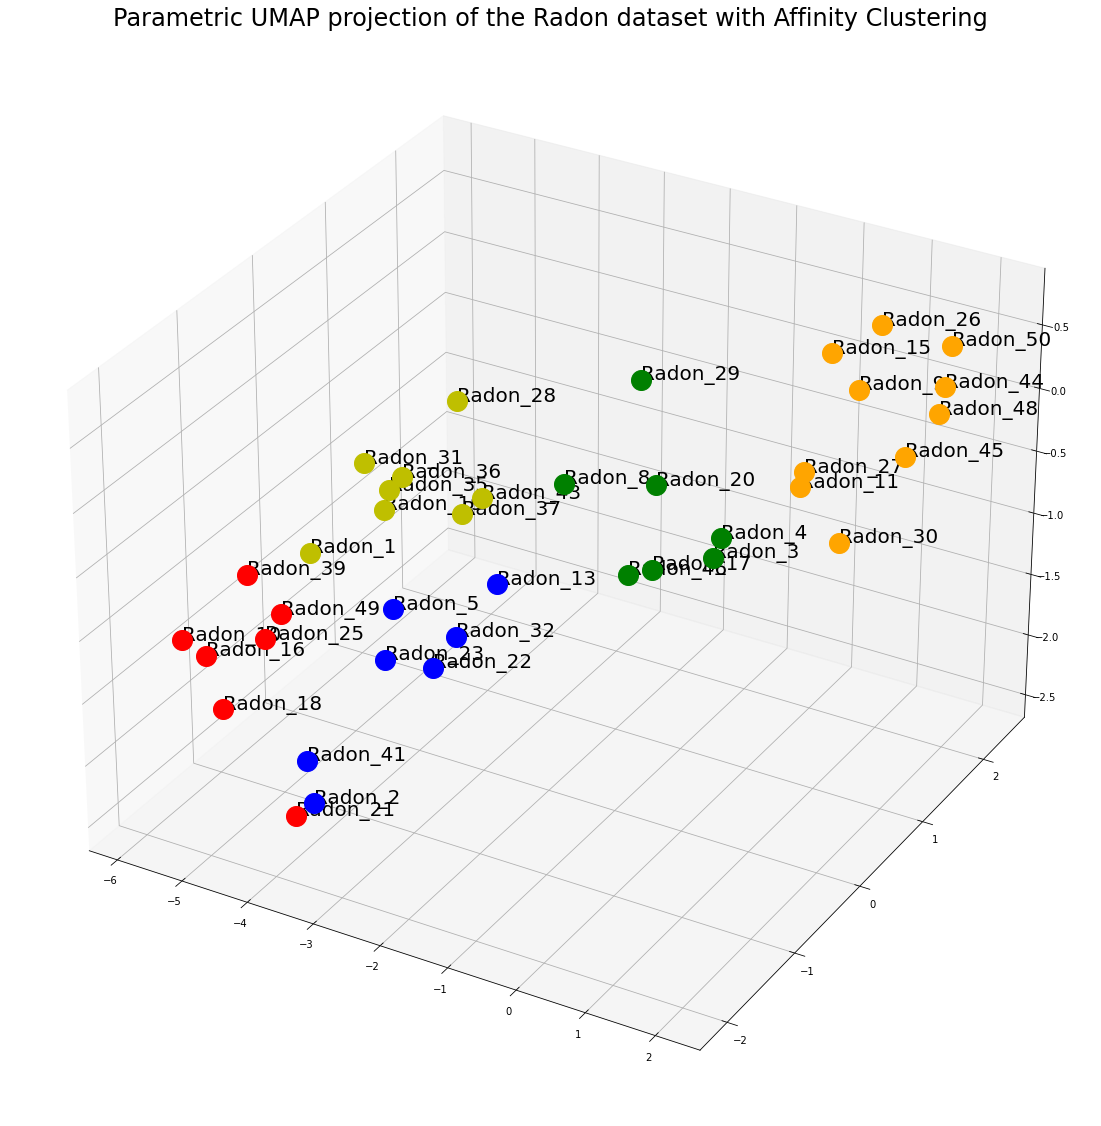

In [70]:
names = list(df_radon.index)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
colors = ['r', 'g', 'b','y','orange']
for i in range(len(embedding)):
    x = embedding[i,0]
    y = embedding[i, 1]
    z = embedding[i, 2]
    ax.scatter(
        x,
    y,z, s=400, c=colors[y_pred[i]])
    ax.text(x,y,z, names[i], size=20, zorder=1, color='k')

plt.title('Parametric UMAP projection of the Radon dataset with Affinity Clustering', fontsize=24)

In [71]:
from IPython.display import HTML
from matplotlib import animation
def animate(frame):
    ax.view_init(30, frame/4)
    plt.pause(.001)
    return fig

anim = animation.FuncAnimation(fig, animate, frames=200, interval=50)
HTML(anim.to_html5_video())

In [72]:
clusters =dict.fromkeys(set(clustering.labels_), None)
import numpy as np
for i in clusters:
    clusters[i] = list(np.where(clustering.labels_ == i)[0])

clusters

for i in clusters:
    traces=[go.Scatter(
        x = df_radon_scaled.columns,
        y = df_radon_scaled.loc[name,:],
        mode = 'markers+lines',
        name = name
    ) for name in [list(df_radon_scaled.index)[j] for j in clusters[i]]]
    
    layout = go.Layout(title = f'Visualizing Scaled values of Cluster {i}')
    fig = go.Figure(data=traces, layout = layout)
    pyo.plot(fig, filename=f'Parametric_UMAP_Cluster_Affinity_{i}.html')